In [36]:
!pip install pathlib2

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels

In [215]:
import pathlib2
from pathlib2 import Path
import logging

currentPath = Path.cwd()
currentPath

PosixPath('/content')

## Get data from folder
Here, we're using Dharavi data

In [216]:
dataPath = Path('/content/drive/My Drive/BE Air Quality Monitoring/Implementation/Data Collection/dharavi.csv')
# for x in path.iterdir():
#     print (x)

## View the data

In [217]:
dataLoc = currentPath.joinpath(dataPath)

df = pd.read_csv(dataLoc)

df.head()
# df.interpolate(method='linear',limit_direction='forward')

# plt.plot(dataset[1:500])
# plt.show()

,Date,Timestamp,AQI,Category,Color,Dominant_Pollutant,CO,CO_Units,NO2,NO2_Units,O3,O3_Units,PM10,PM10_Units,PM25,PM25_Units,SO2,SO2_Units,active,children,elderly,general_pop,heart,lung,pregnant
0,31-10-19,21:00:00,117,Moderate air quality,#FFFF00,co,3228.10,ppb,21.50,ppb,5.87,ppb,67.60,ug/m3,35.76,ug/m3,3.89,ppb,Reduce the intensity of your outdoor activitie...,Reduce the intensity of your outdoor activitie...,Reduce the intensity of your outdoor activitie...,If you start to feel respiratory discomfort su...,Reduce the intensity of your outdoor activitie...,Reduce the intensity of your outdoor activitie...,"To keep you and your baby healthy, reduce the ..."
1,31-10-19,22:00:00,118,Moderate air quality,#FFFF00,co,3252.30,ppb,26.16,ppb,6.17,ppb,62.91,ug/m3,42.36,ug/m3,4.37,ppb,Reduce the intensity of your outdoor activitie...,Reduce the intensity of your outdoor activitie...,Reduce the intensity of your outdoor activitie...,If you start to feel respiratory discomfort su...,Reduce the intensity of your outdoor activitie...,Reduce the intensity of your outdoor activitie...,"To keep you and your baby healthy, reduce the ..."
2,31-10-19,23:00:00,119,Moderate air quality,#FFFF00,co,2927.61,ppb,34.90,ppb,6.62,ppb,61.56,ug/m3,41.23,ug/m3,4.37,ppb,Reduce the intensity of your outdoor activitie...,Reduce the intensity of your outdoor activitie...,Reduce the intensity of your outdoor activitie...,If you start to feel respiratory discomfort su...,Reduce the intensity of your outdoor activitie...,Reduce the intensity of your outdoor activitie...,"To keep you and your baby healthy, reduce the ..."
3,01-11-19,0:00:00,118,Moderate air quality,#FFFF00,co,2628.84,ppb,35.97,ppb,3.24,ppb,16.10,ug/m3,77.07,ug/m3,4.88,ppb,Avoid intense activities outdoors. Stay away f...,Avoid intense activities outdoors. Stay away f...,Avoid intense activities outdoors. Stay away f...,Reduce the intensity of your outdoor activitie...,Avoid intense activities outdoors. Keep releva...,Avoid intense activities outdoors. Keep releva...,"To keep you and your baby healthy, avoid inten..."
4,01-11-19,1:00:00,117,Moderate air quality,#FFFF00,co,2192.01,ppb,38.07,ppb,6.22,ppb,69.98,ug/m3,33.82,ug/m3,4.68,ppb,Reduce the intensity of your outdoor activitie...,Reduce the intensity of your outdoor activitie...,Reduce the intensity of your outdoor activitie...,If you start to feel respiratory discomfort su...,Reduce the intensity of your outdoor activitie...,Reduce the intensity of your outdoor activitie...,"To keep you and your baby healthy, reduce the ..."


In [218]:
df.dtypes

Date                   object
Timestamp              object
AQI                     int64
Category               object
Color                  object
Dominant_Pollutant     object
CO                    float64
CO_Units               object
NO2                   float64
NO2_Units              object
O3                    float64
O3_Units               object
PM10                  float64
PM10_Units             object
PM25                  float64
PM25_Units             object
SO2                   float64
SO2_Units              object
active                 object
children               object
elderly                object
general_pop            object
heart                  object
lung                   object
pregnant               object
dtype: object

### Cleaning up the data

In [219]:
df.drop(df.columns[17:25],axis = 1, inplace=True)
df.drop(df.columns[[3,4,7,9,11,13,15]],axis = 1, inplace=True)
df.head()

,Date,Timestamp,AQI,Dominant_Pollutant,CO,NO2,O3,PM10,PM25,SO2
0,31-10-19,21:00:00,117,co,3228.10,21.50,5.87,67.60,35.76,3.89
1,31-10-19,22:00:00,118,co,3252.30,26.16,6.17,62.91,42.36,4.37
2,31-10-19,23:00:00,119,co,2927.61,34.90,6.62,61.56,41.23,4.37
3,01-11-19,0:00:00,118,co,2628.84,35.97,3.24,16.10,77.07,4.88
4,01-11-19,1:00:00,117,co,2192.01,38.07,6.22,69.98,33.82,4.68


In [220]:
# df.isnull().sum(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3970 entries, 0 to 3969
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3970 non-null   object 
 1   Timestamp           3970 non-null   object 
 2   AQI                 3970 non-null   int64  
 3   Dominant_Pollutant  3970 non-null   object 
 4   CO                  3970 non-null   float64
 5   NO2                 3970 non-null   float64
 6   O3                  3970 non-null   float64
 7   PM10                3970 non-null   float64
 8   PM25                3970 non-null   float64
 9   SO2                 3970 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 310.3+ KB


# Convert datetime to datetime format
pd.to_datetime()

In [221]:
# df['Datetime'] = df['Date'].astype(str) + df['Timestamp'].astype(str)
df['Datetime'] = df.Date.astype(str).str.cat(df.Timestamp.astype(str), sep=' ')

df['Datetime'] = pd.to_datetime(df['Datetime'])
df.drop(df.columns[[0,1]],axis=1,inplace=True)
# df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3970 entries, 0 to 3969
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   AQI                 3970 non-null   int64         
 1   Dominant_Pollutant  3970 non-null   object        
 2   CO                  3970 non-null   float64       
 3   NO2                 3970 non-null   float64       
 4   O3                  3970 non-null   float64       
 5   PM10                3970 non-null   float64       
 6   PM25                3970 non-null   float64       
 7   SO2                 3970 non-null   float64       
 8   Datetime            3970 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 279.3+ KB


In [223]:
# df.set_index('Datetime', inplace=True)
# df.head()

### Data Visualization

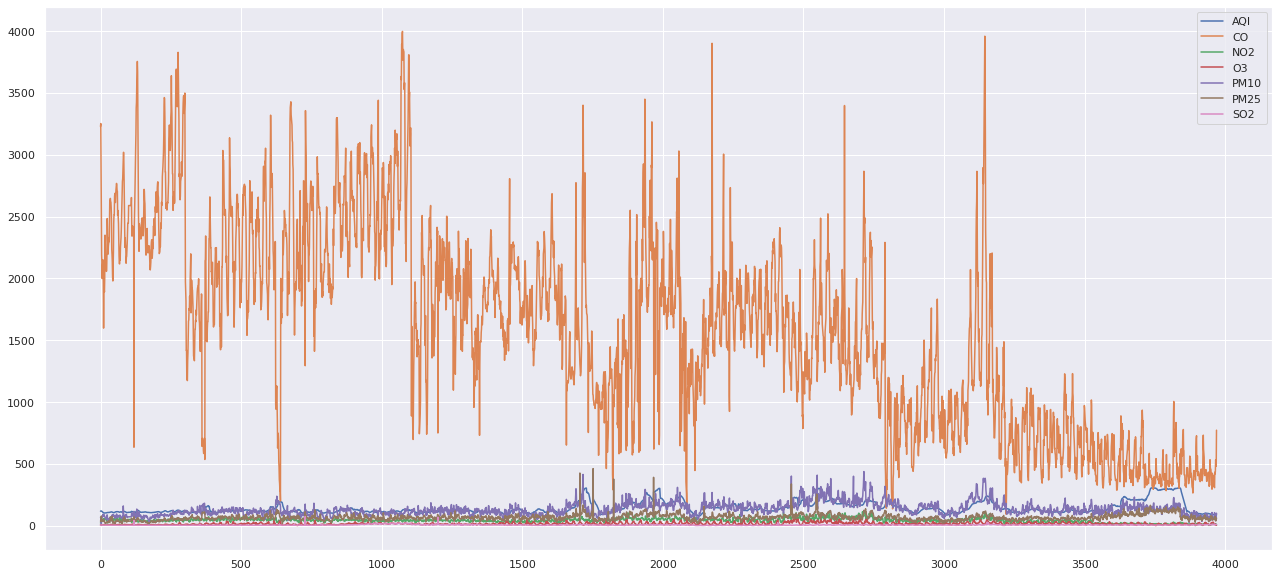

In [224]:
plt.figure(figsize=(22,10))
sns.set()
ax = sns.lineplot(data=df[['AQI','CO','NO2','O3','PM10','PM25','SO2']],dashes=False)

# sns.lineplot(data=df[['AQI','CO']], dashes = False)

### Autocorrelation plots

In [225]:
# from pandas.plotting import autocorrelation_plot
# from statsmodels.graphics import tsaplots

# fig, axes = plt.subplots(nrows=4, figsize=(8, 12))
# def label(ax, string):
#     ax.annotate(string, (1, 1), xytext=(-8, -8), ha='right', va='top',
#                 size=14, xycoords='axes fraction', textcoords='offset points')
    
# axes[0].plot(pm10.pollutant_avg)
# label(axes[0],'Raw Data PM10 Plot')

# axes[1].acorr(pm10.pollutant_avg, maxlags=pm10.pollutant_avg.size-100)
# label(axes[1], 'Matplotlib Autocorrelation PM10')
# print('\n')

# tsaplots.plot_acf(pm10.pollutant_avg, axes[2])
# label(axes[2], 'Statsmodels Autocorrelation for PM10')

# pd.plotting.autocorrelation_plot(pm10.pollutant_avg, ax=axes[3])
# label(axes[3], 'Pandas Autocorrelation for Pm10')


# plt.show()

In [226]:
!pip install --upgrade keras


Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


In [227]:
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [228]:
# data = input('Enter which pollutant you want')
data = 'O3'

## Get today's date to decide which values are used from previous trainings


In [229]:
pd.to_datetime('now')

Timestamp('2020-06-29 16:48:25.950349')

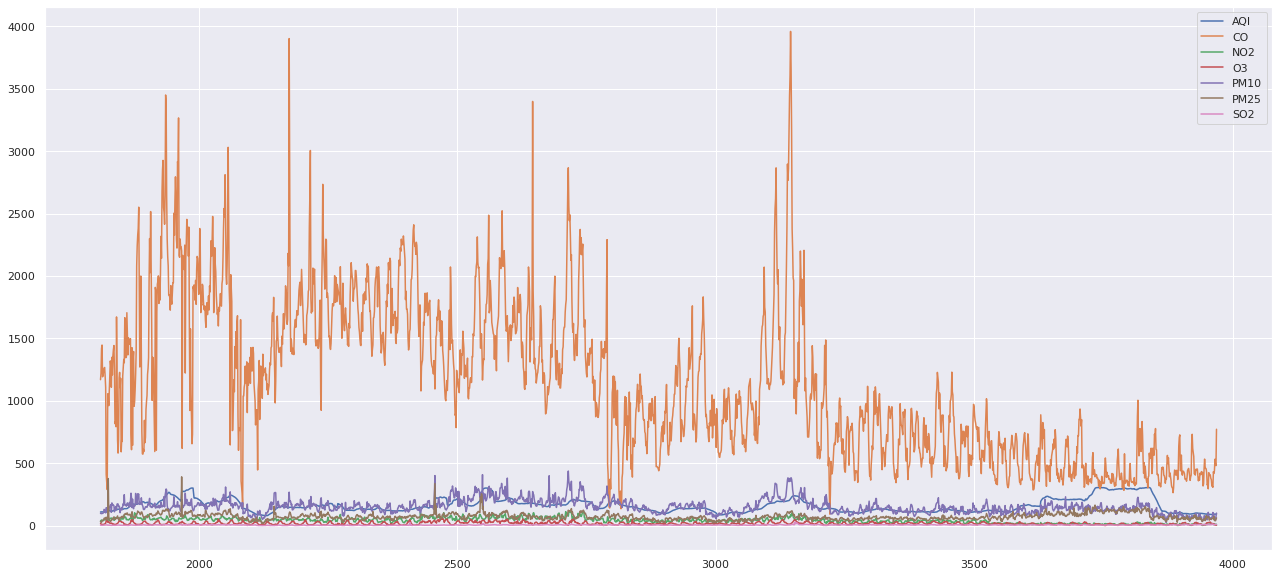

In [230]:
df = df.tail(24*3*30)

plt.figure(figsize=(22,10))
sns.set()
ax = sns.lineplot(data=df[['AQI','CO','NO2','O3','PM10','PM25','SO2']],dashes=False)

# sns.lineplot(data=df[['AQI','CO']], dashes = False)

In [231]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# pollutant_data = scaler.fit_transform(df[[data]])
# # pollutant_data = scaler.inverse_transform(pollutant_data)

In [232]:
# rf=pd.DataFrame()
# for col in list(df):
#     rf[col] = scaler.fit_transform(df[col])

# plt.figure(figsize=(22,10))
# sns.set()
# ax = sns.lineplot(data=rf[['AQI','CO','NO2','O3','PM10','PM25','SO2']],dashes=False)

In [233]:
# fix random seed for reproducibility
np.random.seed(7)
df.head()

,AQI,Dominant_Pollutant,CO,NO2,O3,PM10,PM25,SO2,Datetime
1810,109,pm10,1169.21,36.55,17.03,97.45,33.28,3.34,2020-01-15 20:00:00
1811,110,pm10,1219.89,40.33,14.32,100.09,26.28,3.02,2020-01-15 21:00:00
1812,110,pm10,1419.37,45.07,7.54,96.03,27.19,2.79,2020-01-15 22:00:00
1813,110,pm10,1446.59,41.43,7.66,97.69,36.77,2.79,2020-01-15 23:00:00
1814,110,pm10,1192.17,38.84,9.79,97.91,43.84,3.39,2020-01-16 00:00:00


In [234]:
scaler = MinMaxScaler(feature_range=(0, 1))
pollutant_data = scaler.fit_transform(df[[data]])
# pollutant_data=df[[data]].values
pollutant_data[1:5]

array([[0.19238336],
       [0.09710512],
       [0.09879146],
       [0.128724  ]])

After we model our data and estimate the skill of our model on the training dataset, we need to get an idea of the skill of the model on new unseen data. For a normal classification or regression problem, we would do this using cross validation.

With time series data, the sequence of values is important. A simple method that we can use is to split the ordered dataset into train and test datasets. The code below calculates the index of the split point and separates the data into the training datasets with 67% of the observations that we can use to train our model, leaving the remaining 33% for testing the model.

In [235]:
# split into train and test sets
train_size = int(len(pollutant_data) * 0.67)
test_size = len(pollutant_data) - train_size
train, test = pollutant_data[0:train_size,:], pollutant_data[train_size:len(pollutant_data),:]
print(len(train), len(test))

1447 713


In [236]:
print(train[1:5])

[[0.19238336]
 [0.09710512]
 [0.09879146]
 [0.128724  ]]


Now we can define a function to create a new dataset, as described above.

The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period — in this case defaulted to 1.

This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).

It can be configured, and we will by constructing a differently shaped dataset in the next section.

In [237]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

Let’s use this function to prepare the train and test datasets for modeling.

In [238]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainY[1:5]

array([0.09710512, 0.09879146, 0.128724  , 0.12619449])

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample. We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:

In [239]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [240]:
print(len(trainY))
print(trainY[1:5])

1445
[0.09710512 0.09879146 0.128724   0.12619449]


We are now ready to design and fit our LSTM network for this problem.

The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs and a batch size of 1 is used.

In [241]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=15, batch_size=1, verbose=2)
history

Epoch 1/15
1445/1445 - 4s - loss: 0.0127 - accuracy: 6.9204e-04
Epoch 2/15
1445/1445 - 4s - loss: 0.0072 - accuracy: 6.9204e-04
Epoch 3/15
1445/1445 - 4s - loss: 0.0065 - accuracy: 6.9204e-04
Epoch 4/15
1445/1445 - 4s - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 5/15
1445/1445 - 4s - loss: 0.0067 - accuracy: 6.9204e-04
Epoch 6/15
1445/1445 - 4s - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 7/15
1445/1445 - 4s - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 8/15
1445/1445 - 4s - loss: 0.0065 - accuracy: 6.9204e-04
Epoch 9/15
1445/1445 - 4s - loss: 0.0062 - accuracy: 6.9204e-04
Epoch 10/15
1445/1445 - 4s - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 11/15
1445/1445 - 5s - loss: 0.0065 - accuracy: 6.9204e-04
Epoch 12/15
1445/1445 - 4s - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 13/15
1445/1445 - 4s - loss: 0.0063 - accuracy: 6.9204e-04
Epoch 14/15
1445/1445 - 4s - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 15/15
1445/1445 - 4s - loss: 0.0062 - accuracy: 6.9204e-04


Once the model is fit, we can estimate the performance of the model on the train and test datasets. This will give us a point of comparison for new models.

Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).

dict_keys(['loss', 'accuracy'])


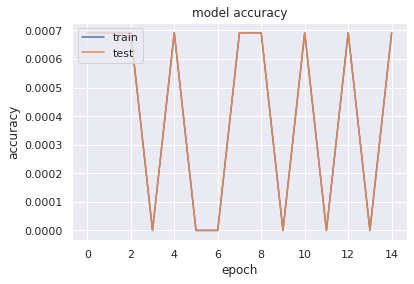

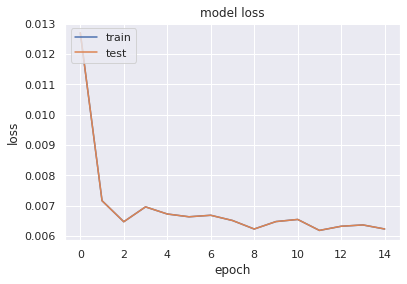

In [242]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [243]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 21.64 RMSE
Test Score: 16.77 RMSE


In [244]:
trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
pollutant_data = scaler.inverse_transform(df[[data]])

Finally, we can generate predictions using the model for both the train and test dataset to get a visual indication of the skill of the model.

Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. Once prepared, the data is plotted, showing the original dataset in blue, the predictions for the training dataset in green, and the predictions on the unseen test dataset in red.

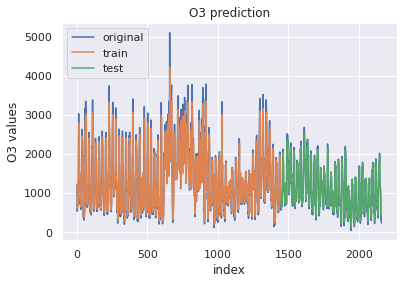

In [245]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(pollutant_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(pollutant_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(pollutant_data)-1, :] = testPredict
# plot baseline and predictions
inv, =plt.plot(pollutant_data,label='original')
train, =plt.plot(trainPredictPlot,label='train')
test, =plt.plot(testPredictPlot,label='test')

plt.title("{} prediction".format(data))
plt.xlabel('index')
plt.ylabel('{} values'.format(data))
plt.legend(handles=[inv,train,test],loc='upper left')
plt.show()


In [246]:
testPredict[:12]

array([[ 625.508  ],
       [ 762.74884],
       [ 723.8274 ],
       [ 949.49316],
       [1017.68665],
       [ 966.07043],
       [ 769.45135],
       [ 723.8274 ],
       [ 713.74854],
       [1070.458  ],
       [1126.3372 ],
       [1227.7141 ]], dtype=float32)